
# Project: Investigate a Dataset (TMDb Movie Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This Project will be focused on investigating The Movie Database (TMDb) which contains various information about 10,000 movies such as their genres, runtime, ratings, budget, revenue etc.

We will be investigating the following key questions:

1. Which are the most popular genres?
2. Most profitable and least profitable movie of all time?  
3. Does all high budget movies generates high profit?
4. Does more movies release in recent time than back in the days?
5. Are current generation movies lengthier or shorter than old generation movies? 
6. How much has the movie industry grown over the years?
7. Which are the top 10 Production Companies with maximum number of movie releases?

In [171]:
# import essential packages for investigation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## Dataset Definitions

id :Id or Index

imdb_id :Unique ID given by IMDB

popularity :Popularity of the movie

budget :Budget of the movie

revenue :Revenue by the movie

original_title :Movie name

cast :Movie casts

homepage :Movie url/website

director :Director of the movie

tagline  :Movie Tagline

keywords :Keywords describing the movie

runtime :Movie length or duration

genres :Type of movie

production_companies :Companies(Investors)

vote_count :Number of votes

vote_average :Average vote rating

release_year :Released year

<a id='wrangling'></a>
## Data Wrangling

In [172]:
#read the movie data
df_movie = pd.read_csv('tmdb-movies.csv')

In [173]:
#view first 5 samples of the movie dataset
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Data Notion:

1. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
2. There are some odd characters in the ‘cast’ column. Data clean up not required.
3. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [174]:
df_movie.keywords[0]

'monster|dna|tyrannosaurus rex|velociraptor|island'

In [175]:
# total rows=10866, columns=21
df_movie.shape

(10866, 21)

In [176]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [177]:
# view the summary statistics of the dataset
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 The budget, revenue, runtime, budget_adj, revenue_adj columns has a min value of 0 which is a definite data issue. 

In [178]:
# view all the columns in the dataframe
df_movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

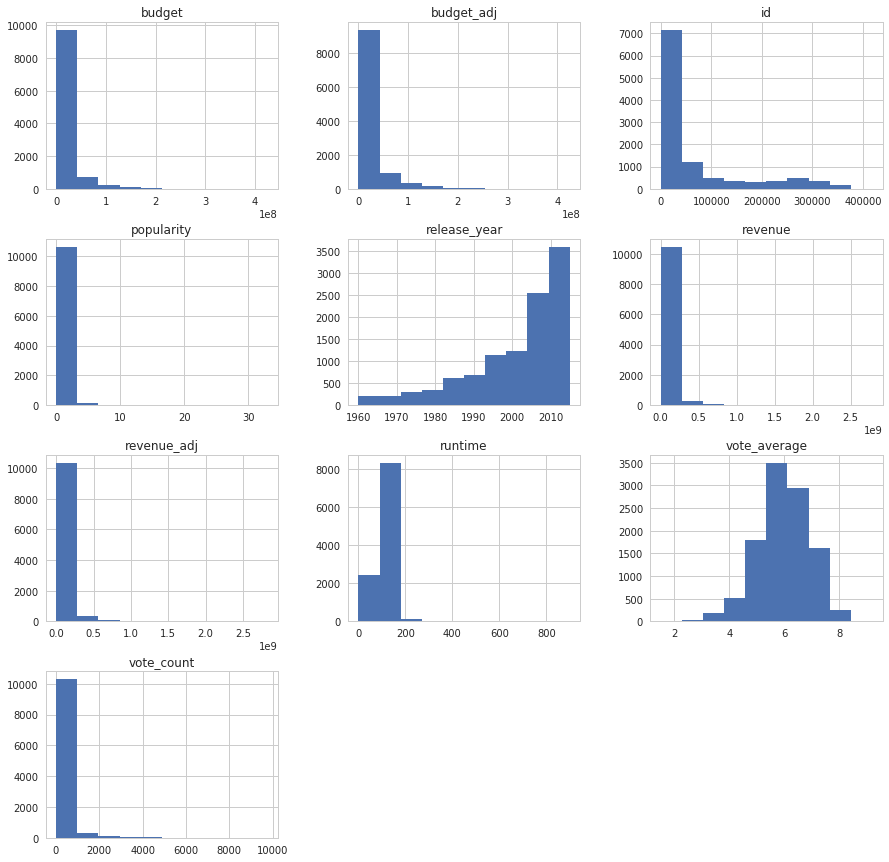

In [179]:
# using histogram we can look for data distribution. Most of the ddata looks positive skewed.
df_movie.hist(figsize=(15,15));

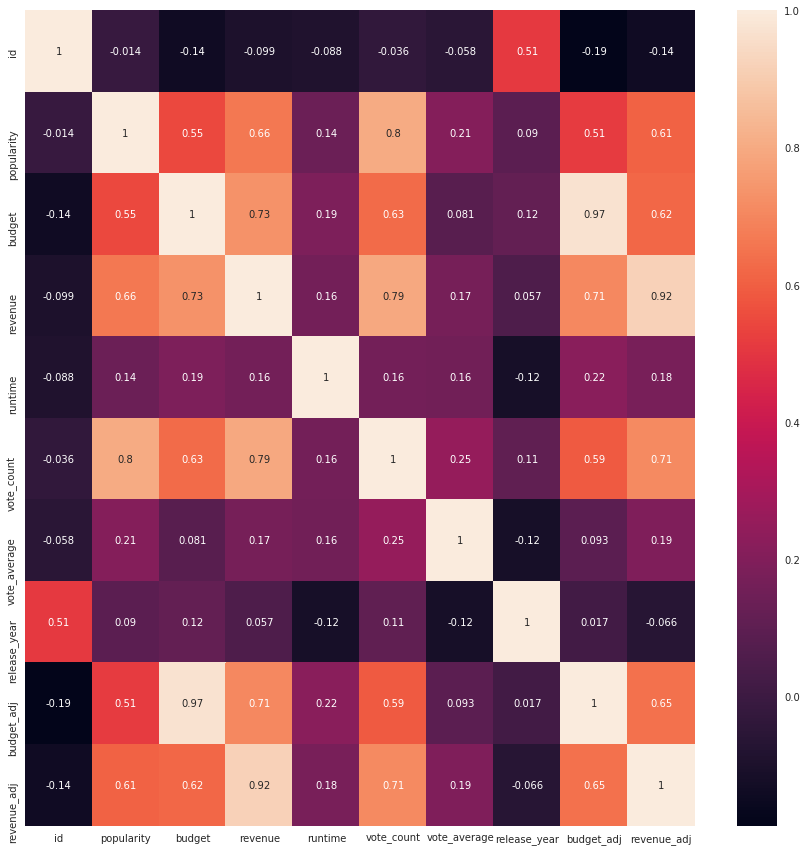

In [180]:
# Plot heatmap : rectangular data as a color-encoded matrix. Basically to look for correlation
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_movie.corr(), ax=ax, annot=True);

By looking at above heat map, we can say that there is a 
positive correlation:
    1. popularity with renevue and vote_count.
    2. Budget with renevue
   



### First Look

Many rows seems to contain several values, which are seperated by an "|".  And there are several missing records too in below columns.

1. imdb_id                 10856 non-null object
2. cast                    10790 non-null object
3. homepage                2936 non-null object
4. director                10822 non-null object
5. tagline                 8042 non-null object
6. keywords                9373 non-null object
7. overview                10862 non-null object
8. genres                  10843 non-null object
9. production_companies    9836 non-null object


However, there are columns in the dataset, which are not important to the intended analysis and therefore will be removed, which includes:

1. imdb_id
2. homepage
3. overview
4. cast
5. tagline
6. director

### Data Cleaning

In this section, below steps will be carried out to clean the dataset:

1. Deleting uneccessary columns
2. Dropping any duplicated rows.
3. Filling with mean or median wherever necessery on the columns under study.

In [181]:
#create a copy of the original dataset
df=df_movie.copy()

In [182]:
#deleting all unneccessary columns which will not be used for our analysis
#creating a list of columns to delete
del_col=['id', 'imdb_id', 'homepage', 'cast', 'director', 'tagline', 'overview', 'budget_adj', 'revenue_adj']

#drop the unwanted columns
df.drop(del_col, axis=1, inplace=True)

#previewing the new dataset
df.head(5)

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [183]:
#looks like there is only one duplicate. can drop it.
sum(df.duplicated())


1

In [184]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [185]:
#test for duplicates
sum(df.duplicated())

0

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


In [187]:
# figure out rows with null, NA , zero, 0 values. 
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [188]:
#Half of the data for renevue and budget is 0
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [189]:
#The are lots of 0 values for revenue and budget. This needs to be replaced with mean or medium. 
df[df.values==0]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015
36,3.358321,0,22354572,Solace,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015
48,2.932340,30000000,0,Wild Card,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015
67,2.331636,20000000,0,Survivor,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015
72,2.272044,0,45895,Beyond the Reach,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015
74,2.165433,0,0,Mythica: The Darkspore,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
74,2.165433,0,0,Mythica: The Darkspore,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
88,1.959765,0,2000000,Equals,illustrator|sex scene|near future|infected|emo...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015


In [190]:
#Lets have a closer look on data set with revene and budget as 0 values
# It is impossible to make a movie with 0 budget
# It is impossible that a movie generating 0 revenue. 
# ---It looks like these values are missed during information or data collection. 

df.loc[(df['revenue']==0) & (df['budget']==0)]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
74,2.165433,0,0,Mythica: The Darkspore,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015
75,2.141506,0,0,Me and Earl and the Dying Girl,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015
92,1.876037,0,0,Mythica: The Necromancer,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
100,1.724712,0,0,Frozen Fever,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015
101,1.661789,0,0,High-Rise,skyscraper|high rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015
103,1.646664,0,0,Spooks: The Greater Good,corruption|terrorist|explosive|police|kidnapping,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015
116,1.380320,0,0,The Scorpion King: The Lost Throne,magic|fantasy|steampunk|dragon,105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015
122,1.342839,0,0,Everly,assassin|mob boss,90,Thriller|Action,Crime Scene Pictures|Radius-TWC|Anonymous Cont...,1/23/15,169,5.1,2015
140,1.144808,0,0,Dragonheart 3: The Sorcerer's Curse,magic|wall|druid|knight|dragon,97,Action|Adventure|Fantasy,Raffaella Productions,2/24/15,59,4.5,2015
143,1.128081,0,0,Brothers of the Wind,eagle|learning to fly|eagle's feather|father s...,98,Adventure|Drama|Family,Terra Mater Factual Studios,12/24/15,11,7.5,2015


In [191]:
# similary no movie can be 0 length as runtime. 
# It is also observed that movies with 0 runtime has ) budget and revenue associated. Shows correlation from the heat map.
df.loc[df['runtime']==0]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,1.876037,0,0,Mythica: The Necromancer,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
334,0.357654,0,0,Ronaldo,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015
410,0.097514,0,0,Anarchy Parlor,tattoo|tattooing,0,Horror,NaN,1/1/15,15,5.6,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,NaN,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015
486,0.176744,0,0,If There Be Thorns,woman director,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015
595,0.028725,0,0,Deep Dark,NaN,0,Horror,NaN,1/1/15,11,4.6,2015
616,0.026797,0,0,The Outfield,NaN,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015
1241,0.135376,0,0,Dance-Off,dance|dance-off,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014
1289,0.037459,3250000,0,Treehouse,kidnapping|brutality|violence|teenager|discovery,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014
1293,0.036904,0,0,Tim Maia,brazilian|biography|music|drama|documentary,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014


lets fill the revenue, budget, runtime with their mean values because the median value is 0 for both revenue and budget.


In [192]:
print('median value for budget:', df.budget.median())
print('median value for revenue:', df.revenue.median())

median value for budget: 0.0
median value for revenue: 0.0


In [193]:
df['budget'].replace(0,df['budget'].mean(), inplace=True)
df[df['budget']==0]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [194]:
# Test the changes: 
# looks good as there are no rows with 0 budget from above results.
print('median value for budget:', df.budget.median())

median value for budget: 14624286.0643


In [195]:
# performing same steps on  revenue and runtime 
df['revenue'].replace(0,df['revenue'].mean(), inplace=True)
df[df['revenue']==0]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [196]:
df['runtime'].replace(0,df['runtime'].mean(), inplace=True)
df[df['runtime']==0]

,popularity,budget,revenue,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [197]:
# Test the changes: 
# looks good as there are no rows with 0 revenue from above results.
print('median value for revenue:', df.revenue.median())

median value for revenue: 39826896.0769


<a id='eda'></a>
## Exploratory Data Analysis

##### This section is used for Data Exploration and Analysis. And, now that we have a clean dataset, we will move further with investigating the dataset. We will compute statistics and create visualizations with the goal of addressing the research questions.

## Research Question 1 - Which are the most popular genres?

In [198]:
# The most popular genre based on popularity is "Action|Adventure|Science Fiction|Thriller"
df[df.popularity==df.popularity.max()]['genres']


0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

But, this is not a single genre and this can be confusing. To attain a single single we need to split the dataset on pipe |

In [199]:
#the total number of genres looks impossible.
df.genres.nunique()

2039

In [200]:
#There are multiple columns for ex: 'cast', 'director', 'genres' having | splitting multiple values. 
# So, its better to write a function which splits any column values by |
# Defining a function to split the data that was seperated by a '|' sperator on any columns.

def data_seperator(data_to_seperate):    
    common_data_seperated = df[data_to_seperate].str.cat(sep="|")    
    # Splitting the data    
    seperated_data = pd.Series(common_data_seperated.split('|'))    
    # Performing count of seperated data    
    result_data_counts = seperated_data.value_counts()    
    return result_data_counts,seperated_data

In [201]:
# splitted genre of movies which are popular
# Call data_seperator function to seperate the genres data that was seperated by a | seperator
genre_movie_counts,genre_seperated_data = data_seperator('genres')
# data split by genres
genre_movie_counts

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [202]:
df1=df.copy() #create local copy
genres_split = df1['genres'].str.split('|').apply(pd.Series, 1).stack()
genres_split.index = genres_split.index.droplevel(-1)
genres_split.name = 'genres'
del df1['genres']
df_genres = df1.join(genres_split)
df_genres.head()

,popularity,budget,revenue,original_title,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Action
0,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Adventure
0,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Science Fiction
0,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,Thriller
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,Action


In [203]:
# now the number of genres looks realistic!
df_genres.genres.nunique()

20

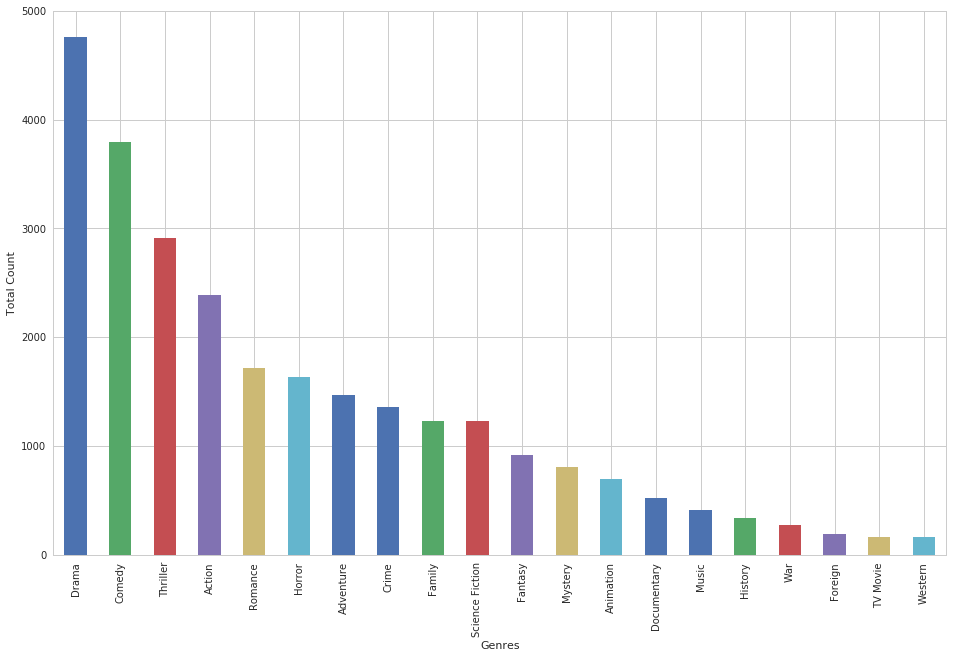

In [204]:
#visualization of the frequency of the indivual genres in the dataset
df_genres['genres'].value_counts().plot(kind='bar', figsize=(16, 10));
plt.xlabel("Genres",)
plt.ylabel("Total Count");

In [205]:
#Let us check the sum of popularity per genre.
genre_popularity = df_genres.groupby(['genres']).popularity.sum()
genre_popularity.sort_values(ascending=False)

genres
Drama              2815.517715
Comedy             2247.759649
Action             2208.238255
Thriller           2155.723620
Adventure          1697.915054
Science Fiction    1230.902062
Romance            1013.644468
Crime              1008.635823
Family              968.388793
Fantasy             909.441171
Horror              761.788804
Animation           595.674975
Mystery             558.909827
Music               198.827043
War                 196.474450
History             192.362605
Western              97.451554
Documentary          94.344445
TV Movie             45.239592
Foreign              36.001309
Name: popularity, dtype: float64

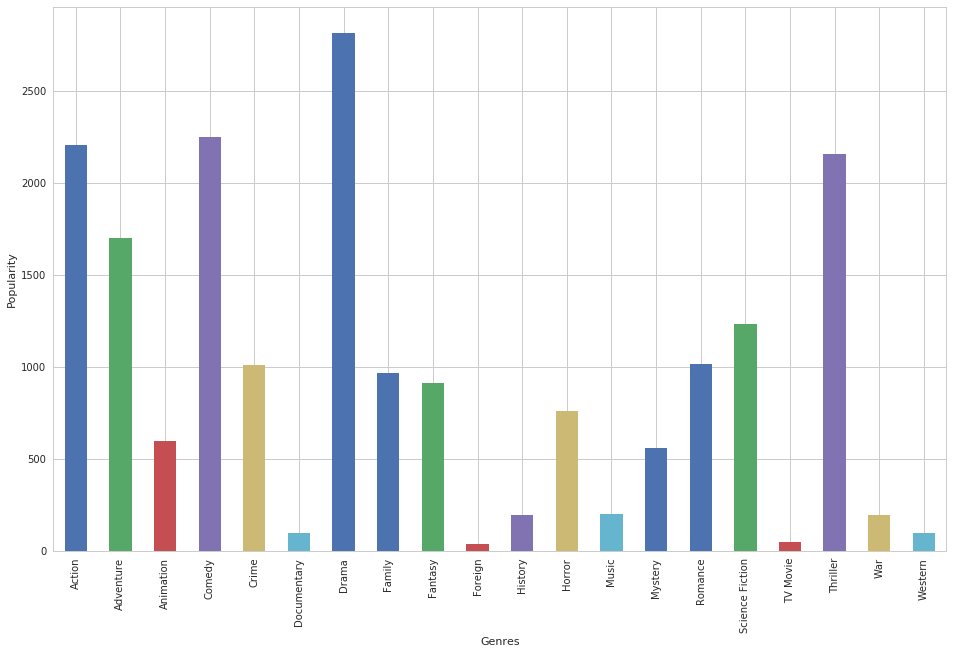

In [206]:
genre_popularity.plot.bar(figsize=(16, 10))
plt.xlabel("Genres")
plt.ylabel("Popularity")
plt.show()

#### From this bar chat we can easily say that Drama is the most popular movie genre followed by Comedy, Action and Thriller which are almost equally popular

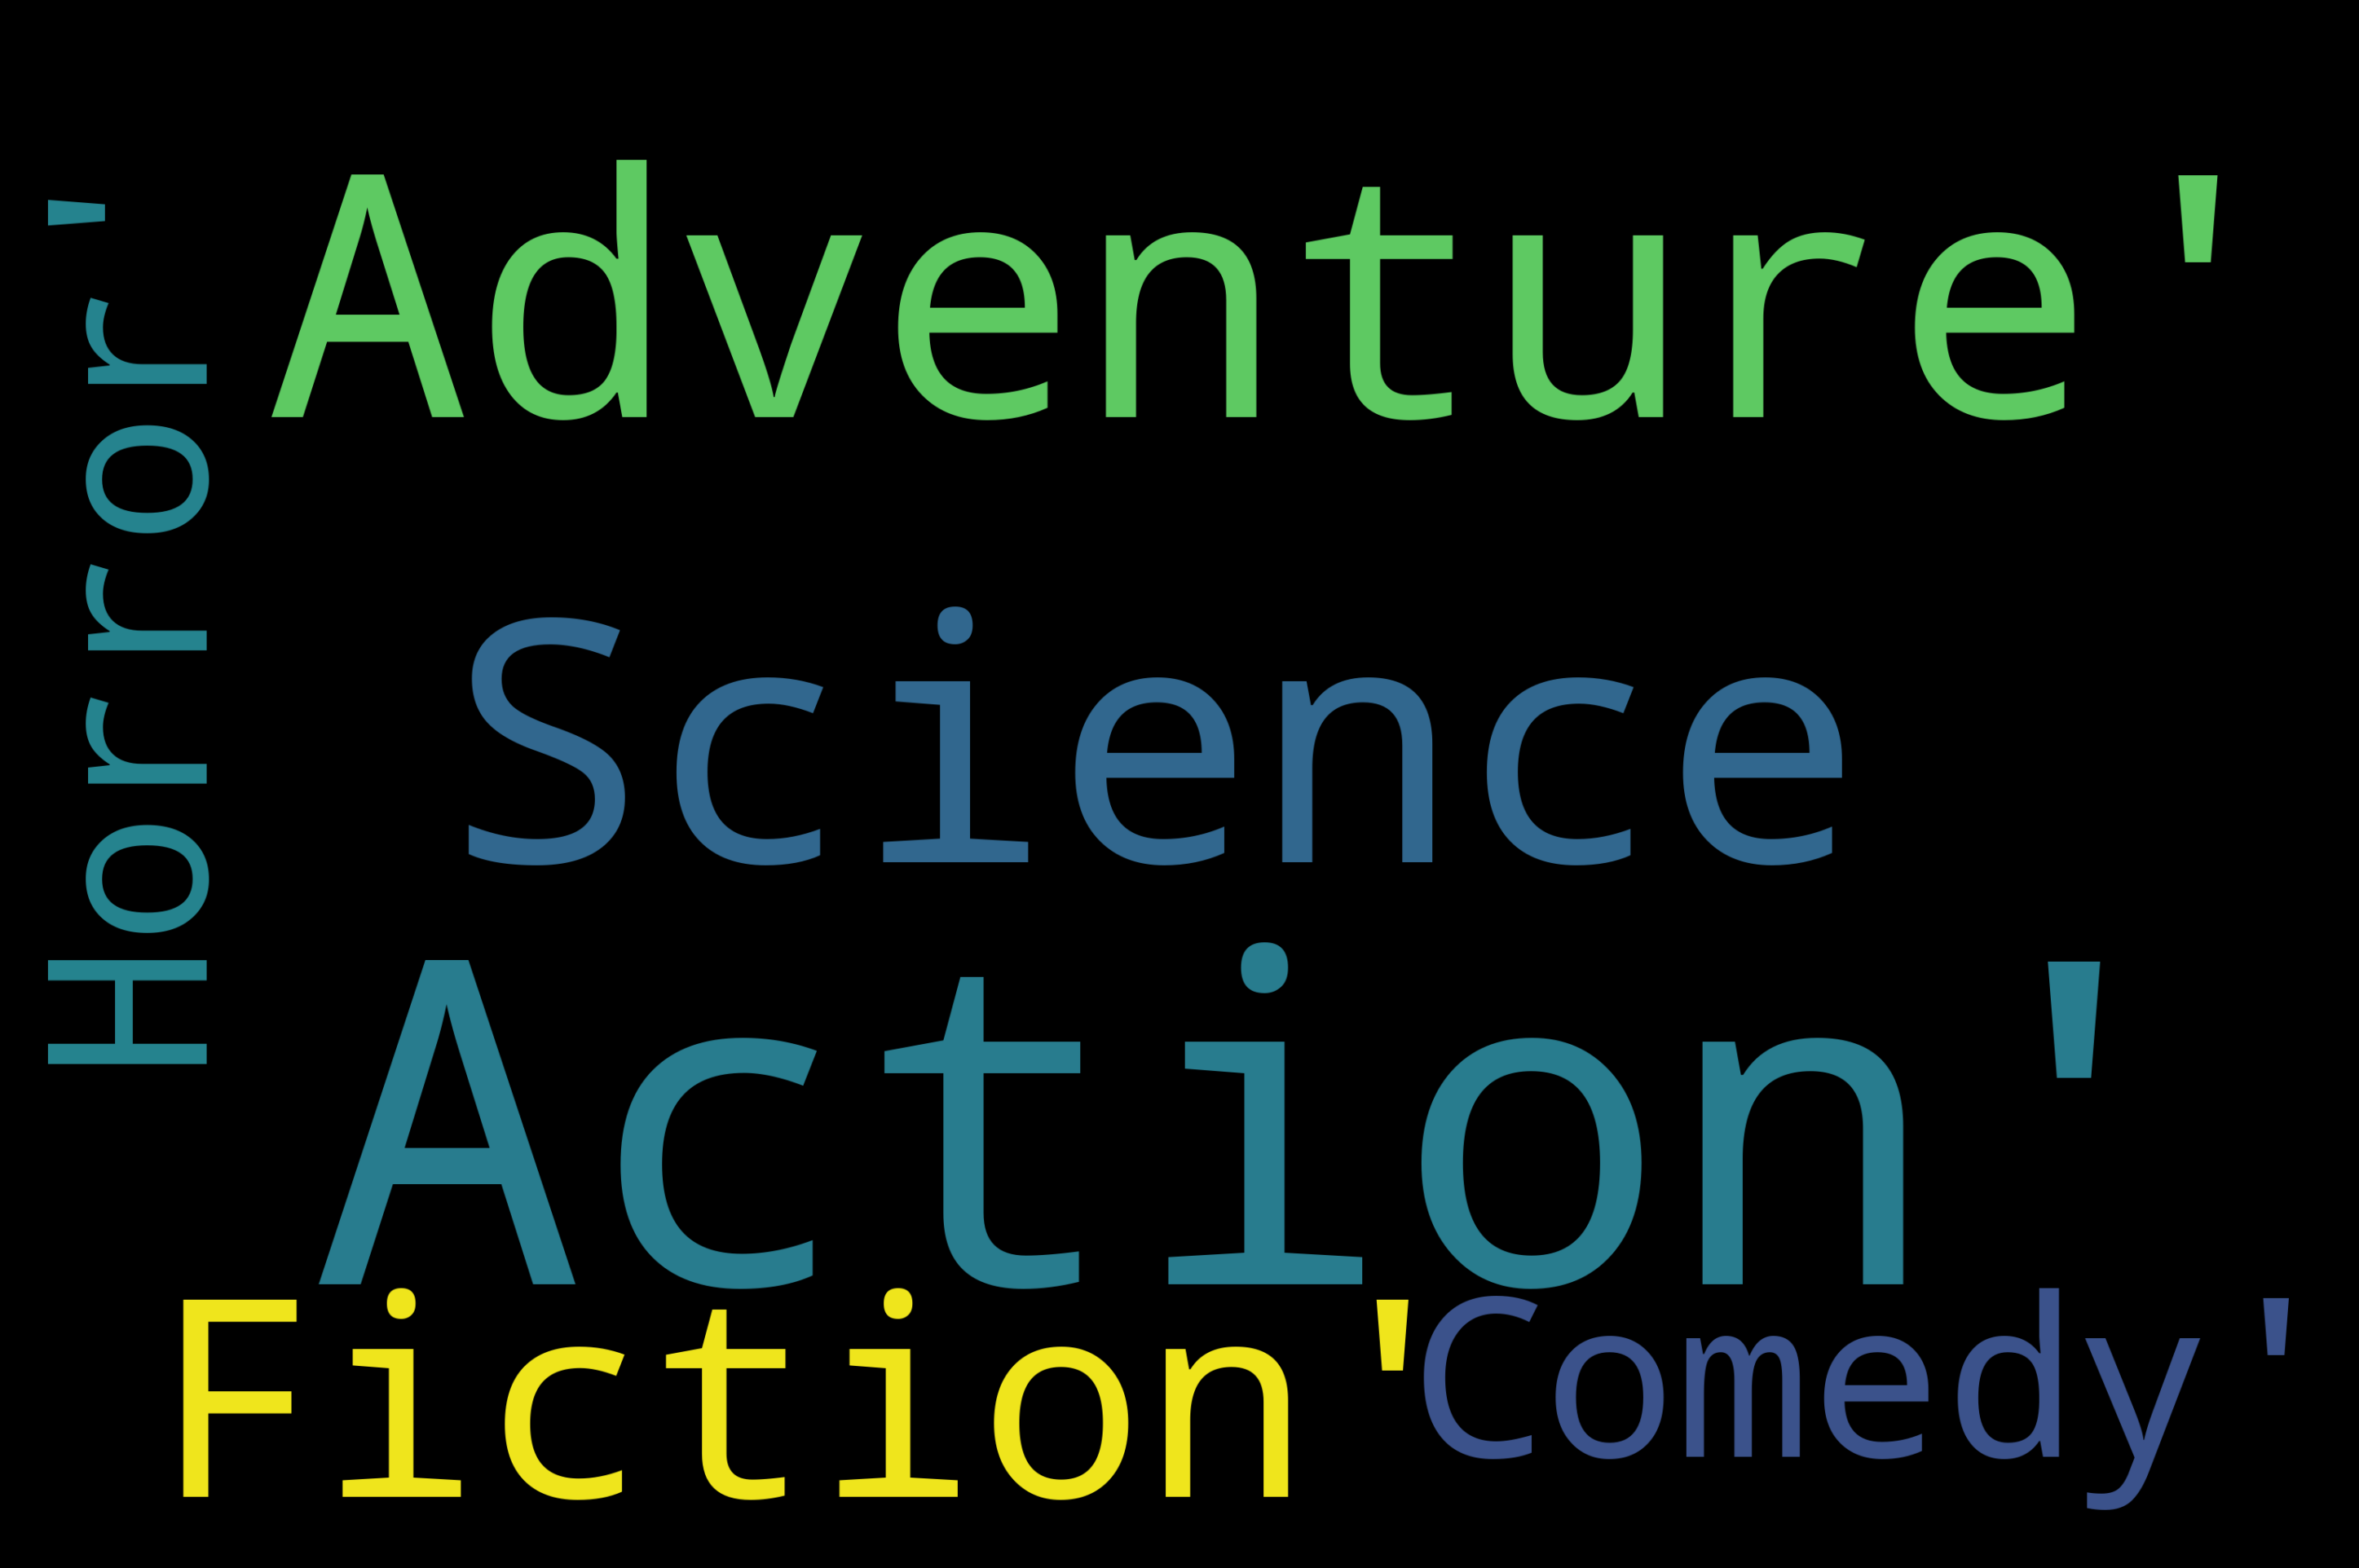

In [207]:
# A word cloud visualization of the movie Genres.
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
# Create a list of word
text = df_genres.values 
 
# Create the wordcloud object
wordcloud = WordCloud(width=3000, height=2000, margin=0).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
 
# Display the generated image:
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

## Research Question 2  -  Most profitable and least profitable movie of all time?             

Calculating the profit of each movie

In [208]:
df_profit=df.copy() #working with a copied local variable
df_profit.insert(3,'profit',df_profit['revenue']-df_profit['budget'])
#previewing the changes in the dataset
df_profit.head()

,popularity,budget,revenue,profit,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [209]:
import pprint
#defining the function
def calculate(column):
    #highest profit
    high= df_profit[column].idxmax()
    high_details=pd.DataFrame(df_profit.loc[high])
    
    #lowest profit
    low= df_profit[column].idxmin()
    low_details=pd.DataFrame(df_profit.loc[low])
    
    #summing in one table
    info=pd.concat([high_details, low_details], axis=1)
    info.columns=['Highest Revenue', 'Lowest Revenue']
    return info

#Display highest and lowest revenue generated movies of all time
calculate('profit')

,Highest Revenue,Lowest Revenue
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,12/10/09,12/2/10


### The most profitable movie is 'Avatar' and the least profitable movie is 'The Warrior's Way'

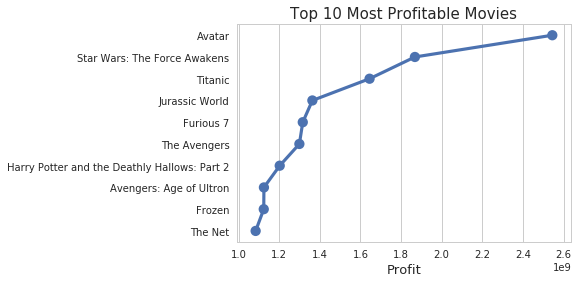

In [210]:
# A visualization of top 10 most profitable movies.
#sort the 'Profit' column in decending order and store it in the new dataframe
info = pd.DataFrame(df_profit['profit'].sort_values(ascending = False))
info['original_title'] = df_profit['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])

#make a plot usinf pointplot for top 10 most profitable movies.
ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Most Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

In [211]:
# high vote count results in better movie renevue?
df_profit[df_profit['vote_count']>=df_profit['vote_count'].mean()]

,popularity,budget,revenue,profit,original_title,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,1.500000e+08,1.513529e+09,1.363529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,1.500000e+08,3.784364e+08,2.284364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,1.100000e+08,2.952382e+08,1.852382e+08,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,2.000000e+08,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,1.900000e+08,1.506249e+09,1.316249e+09,Furious 7,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,9.110700,1.350000e+08,5.329505e+08,3.979505e+08,The Revenant,father-son relationship|rape|based on novel|mo...,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,8.654359,1.550000e+08,4.406035e+08,2.856035e+08,Terminator Genisys,saving the world|artificial intelligence|cybor...,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,7.667400,1.080000e+08,5.953803e+08,4.873803e+08,The Martian,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,7.404165,7.400000e+07,1.156731e+09,1.082731e+09,Minions,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,6.326804,1.750000e+08,8.537086e+08,6.787086e+08,Inside Out,dream|cartoon|imaginary friend|animation|kid,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


## Research Question 3  - Does all high budget movies generates high profit?

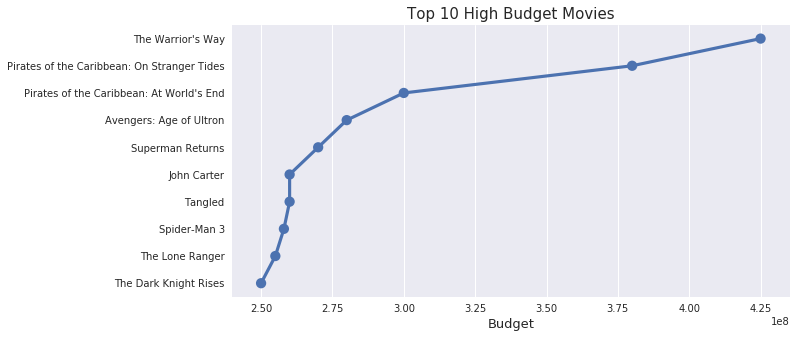

In [212]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df_profit['budget'].sort_values(ascending = False))
info['original_title'] = df_profit['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

When compared to the top 10 most profitable movies chart, except 'Avenger: Age of Ultron' none of the top 10 high budget movies are in the top 10 profitable movies list which is quite a surprise. The Warrior's Way is the most high budget movie. when compared to the profit generated, the number speaks quite the contrary. Well, its definite to say that not all high budget movies are highly profitable. 

## Research Question 4 - Does more movies release in recent time than back in the days?

In [213]:
df_release=df_movie.copy()
print("first movie release year:", df_release.release_year.min())
print("Last movie release year:" , df_release.release_year.max())

first movie release year: 1960
Last movie release year: 2015


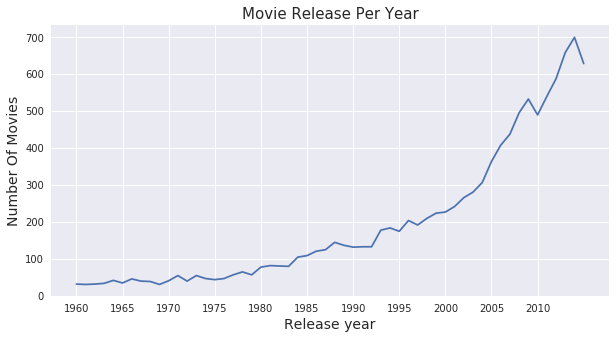

In [214]:
# grouping by release year and counting the number of movies in each year 
data=df_release.groupby('release_year').count()['id']

#grouping by release year and count the total number of movies in each year and plot. Movies from 1960 to 2015 year.
df_release.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2015,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Movie Release Per Year",fontsize = 15)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)
#set the style sheet
sns.set_style("whitegrid")

There is no comparison to the number of movies released in recent times to old days. The volume of movie releases from year 2000 is exponentially high. 
However, 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

## Research Question 5: Are current generation movies lengthier or shorter than old generation movies? 

The comparison would be measured based on 'Average Runtime'

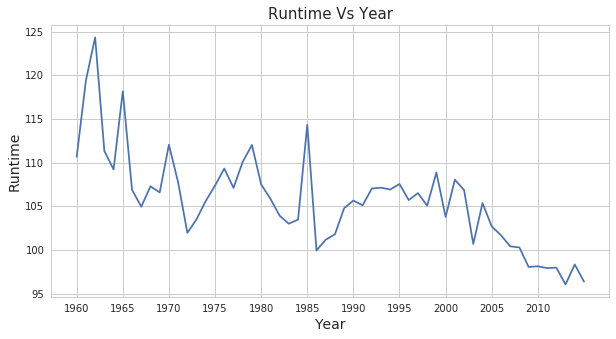

In [215]:
#Plot for movie runtime which differ year over year.
#Mean is used per year as runtime metrics.
df_release.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2015,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 15)

#setup the x-label and y-label of the plot
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Runtime',fontsize = 14)
sns.set_style("whitegrid")

### It is clear from the above plot that current generation movies(2000 year onwards) are much shorter in length as compared to old generation movies. The present movie avg runtime is close to 100mins Vs ~115 mins movies in the past(1960-1980). Hence,average movie runtimes are generally decreasing with time starting from the 120 minute average down to around 95 today.

## Research Question 6 - How much has the movie industry grown over the years?

let's analyze this problem with the use of scatter plots visualizing the evolution of the movie industry over the past 50 years.

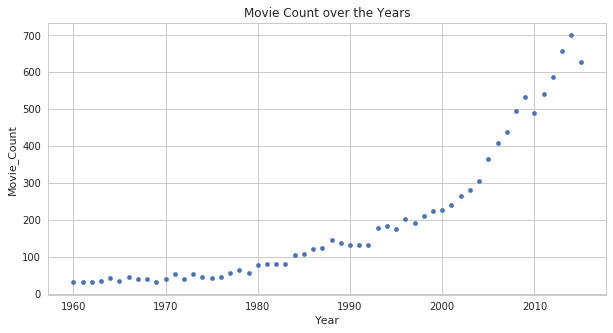

In [216]:
yearwise_count = df_release.groupby(['release_year']).size()
yearwise_count = pd.DataFrame({'Year': yearwise_count.index, 'Movie_Count': yearwise_count.values})
yearwise_count.plot(x='Year', y = 'Movie_Count', title = 'Movie Count over the Years', kind='scatter');

### From the scatter plot it is observed that the movie industry has been growing exponentially over the past 50 years. The releases are almost 7 fold from 1990 to present. 

## Reasearch Question 7: Which are the top 10 Production Companies with maximum number of movie releases?

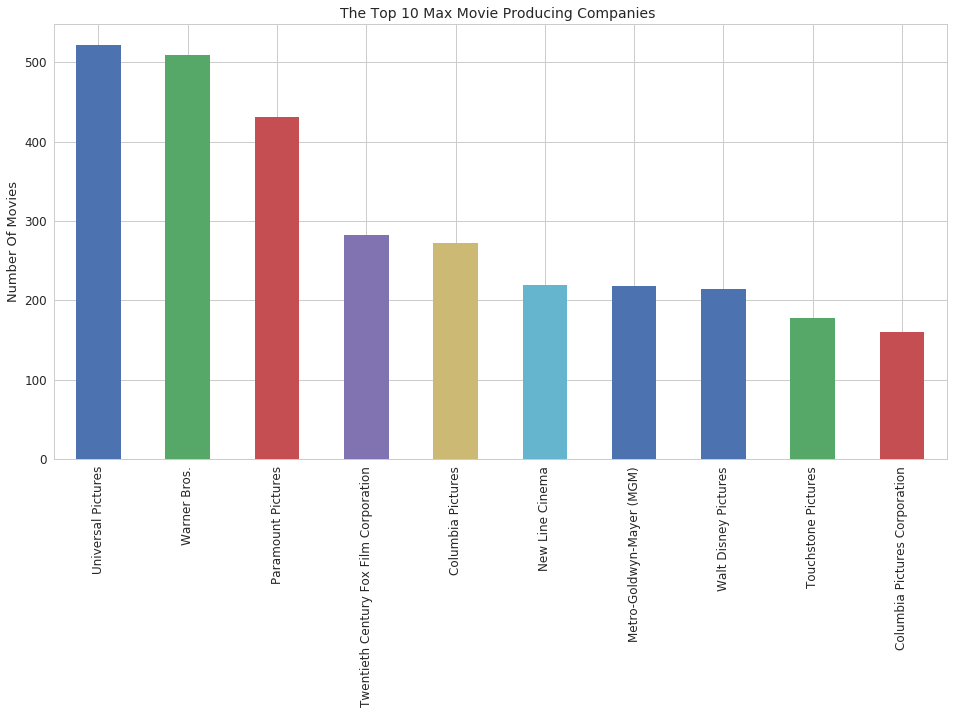

In [217]:
#call the 'data_seperator' function definied earlier to split any data by pipe "|"
#it wiil count number of movies released by each production company.

prod_com_counts,prod_com_data = data_seperator('production_companies')
# data split and count by production companies
#plot the bar plot.
prod_com_counts.iloc[:10].plot(kind='bar',figsize=(16,8),fontsize=12)
plt.title("The Top 10 Max Movie Producing Companies ",fontsize=14)
plt.ylabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

### From the above bar chart we can say that the top players in maximum movie productions are 'Universal Pictures', 'Warner Bros.' , 'paramount Pictures'

<a id='conclusions'></a>
## Conclusions

This section concludes the observation made during explaratory data analysis:

1. Drama is the most popular movie genre followed by Comedy, Action and Thriller, which are almost equally popular.

2. 'Avatar' is the most profitable movie and the least profitable movie is 'The Warrior's Way'

3. Compared to the 10 most profitable movies with the exception of "Avenger: Age of Ultron", none of the 10 best high-budget movies is on the list of the 10 most profitable movies, which is quite a surprise. The Warrior's Way is the movie with the highest budget compared to the profit made, the number speaks quite the opposite. Well, it is definitely to be said that not all high budget films are highly profitable.

4. There is no comparison to the number of movies released in recent times to the old days. The volume of movie released from year 2000 is exponentially high. However, 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

5. It is also observed that current generation movies(2000 year onwards) are much shorter in length as compared to old generation movies. The present movie avg runtime is close to 100mins Vs ~115 mins movies in the past(1960-1980). Hence,average movie runtimes are generally decreasing with time starting from the 120 minute average down to around 95 today.

6. It is also observed that the movie industry has been growing exponentially over the past 50 years. The releases are almost 7 fold from 1990 to present.

7. 'Universal Pictures', 'Warner Bros.', 'paramount Pictures' are the top production companies with maximum movie releases. 

## References

1. Plotting -> https://python-graph-gallery.com/all-charts/ 
2. Word Cloud -> https://stackoverflow.com/questions/57826063/how-to-create-a-wordcloud-according-to-frequencies-in-a-pandas-dataframe
3. Inspiration from github profile - https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb
4. Kaggle - https://www.kaggle.com/tmdb/tmdb-movie-metadata


In [219]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0